# Netflix Customer Churn

## Before the analysis
### Intro
THe project conducts an Exploratory Data Analysis,  actively utilizing machine learning for predictive insights, concluding insights and making suggests on actions. 

### Acknowledgements
The dataset is acquired at: [Kaggle-Netflix Customer Churn dataset](https://www.kaggle.com/datasets/abdulwadood11220/netflix-customer-churn-dataset)

### Import

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('netflix_customer_churn.csv')
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

1. Endgame
   1. churned
2. Product Info
   1. subscription_type 
   2. monthly_fee
3. User demographic
   1. age
   2. gender
   3. region
   4. device
4. User behavior
   1. watch_hours 
   2. last_login_days
   3. payment_method
   4. number_of_profiles
   5. avg_watch_time_per_day
   6. favorite_genre

## EDA - Exploratory Data Analysis

### Endgame
Related columns:
- `churned` 

The churned users and active users are almost even in this dataset. 

In [21]:
df['churned'].value_counts()

churned
1    2515
0    2485
Name: count, dtype: int64

### Product Info
**Related columns:**
- `subscription_type`
- `monthly_fee`
> Info extracted from: [Netflix](https://help.netflix.com/en/node/24926). The actual monthly cost is different from the `monthly_fee` column indicated by the dataset, maybe due to the dataset's outdated data source.
- **Basic:** i.e. Standard with Ads
  - Pricing: $7.99/month
- **Standard**:
  - Pricing: $17.99/month
- **Premium**: 
  - Feature: watch on 4 supported devices & better picture and audio quality
  - Pricing: $24.99/month

The users are evenly distributed across the three subscription types.

In [24]:
df['subscription_type'].replace({'Basic': "0 Basic", 'Standard': "1 Standard", 'Premium': "2 Premium"}, inplace=True)

In [ ]:
df[['subscription_type', 'monthly_fee']]\
    .drop_duplicates()\
    .sort_values(by='subscription_type')\
    .reset_index(drop=True)

,subscription_type,monthly_fee
0,0 Basic,8.99
1,1 Standard,13.99
2,2 Premium,17.99


In [27]:
df['subscription_type']\
    .value_counts()\
    .reset_index()\
    .sort_values("subscription_type")

# # plot a frequency distribution for the 'Subscription Type' column, in the order of Basic, Standard, Premium

# plt.figure(figsize=(8,5))
# sns.countplot(data=df, x='subscription_type', order=['Basic', 'Standard', 'Premium'], color="#BCEB26")
# plt.title('Frequency Distribution of Subscription Type')
# plt.xlabel('Subscription Type')
# plt.ylabel('Count')
# plt.show()

,subscription_type,count
1,0 Basic,1661
2,1 Standard,1646
0,2 Premium,1693


### 

### User Demographic
**Related columns:**
- `age`
- `gender`
- `region`
- `device`

In [39]:
df['age_bucket'] = pd.cut(df['age'], 
                    bins=[0, 18, 25, 35, 45, 55, 65, 100], 
                    labels=['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
                    right=False)

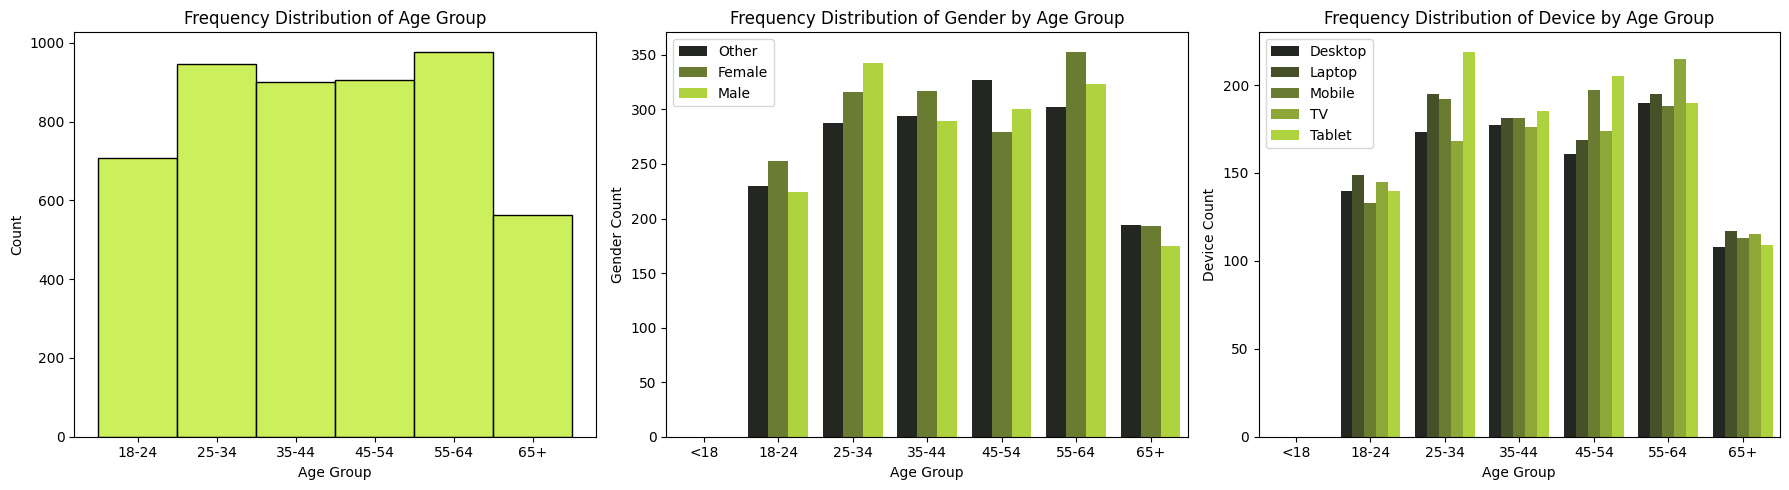

In [49]:
# (1,3) subplots that share the x axis
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=False)

sns.histplot(ax=axes[0], data=df, x='age_bucket', color="#BCEB26")
axes[0].set_title('Frequency Distribution of Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

sns.countplot(ax=axes[1], data = df, x='age_bucket', hue = 'gender', palette='dark:#BCEB26')
axes[1].set_title('Frequency Distribution of Gender by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Gender Count')
axes[1].legend()

sns.countplot(ax=axes[2], data = df.sort_values(by='device'), x='age_bucket', hue = 'device', palette='dark:#BCEB26') 
axes[2].set_title('Frequency Distribution of Device by Age Group')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Device Count')
axes[2].legend()

plt.tight_layout()
plt.show()

**The first graph:** Unexpectedly, the users count for 18-24 age group is significantly lower than other groups (expect from 65+). This maybe due to students' limited ability to pay. 


**The second graph:** The gender distribution is almost even across all age groups.

**The third graph:** Tablet is a more trending device for the younger generations, observed from 25-54, while the senior group (55-64) favors TV. 

In [ ]:
df['region'].value_counts()

# load world map 
# Your data


KeyError: 'continent'